# Guided Project: Exploring eBay Sales Data - Data Cleaning


The aim of this guided project is to clean and analyse used car listings. This notebook only contains the data cleaning process and some initial explorations, I'm going to analyze the data in a different notebook.

The original dataset was scraped from eBay Kleinanzeigen, a classified section of German eBay and is available [here](https://data.world/data-society/used-cars-data). But [Dataquest](https://www.dataquest.io/) prepared a modified version of it for study purposes (making it less clean) and that is what I'm going to use.

The dataset has 50,000 data points and the data dictionary is shown below:

* dateCrawled - When this ad was first crawled. All field-values are taken from this date.
* name - Name of the car.
* seller - Whether the seller is private or a dealer.
* offerType - The type of listing
* price - The price on the ad to sell the car.
* abtest - Whether the listing is included in an A/B test.
* vehicleType - The vehicle Type.
* yearOfRegistration - The year in which the car was first registered.
* gearbox - The transmission type.
* powerPS - The power of the car in PS.
* model - The car model name.
* kilometer - How many kilometers the car has driven.
* monthOfRegistration - The month in which the car was first registered.
* fuelType - What type of fuel the car uses.
* brand - The brand of the car.
* notRepairedDamage - If the car has a damage which is not yet repaired.
* dateCreated - The date on which the eBay listing was created.
* nrOfPictures - The number of pictures in the ad.
* postalCode - The postal code for the location of the vehicle.
* lastSeenOnline - When the crawler saw this ad last online.

# Importing Libraries and Initial Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

autos = pd.read_csv("autos.csv", encoding="Latin-1")
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


In [2]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [3]:
autos.describe(include="all")

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 15:49:30,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


## Initial observations

There are 50000 rows and 20 columns in the dataset. Most columns are strings.

1. Column names are in CamelCase, so a bit difficult to read.

2. Some columns have only a few unique values and might be unnecessary for the analysis

    - seller
    - offerType
    - abtest
    - gearbox
    - nrOfPictures
    - notRepairedDamage

3. These object columns that should be converted to numerical columns:

    - price
    - odometer

4. The following columns have missing values, but none of them has more than 20% so we can replace them with a different value:

- vehicleType
- gearbox
- model
- fuelType
- notRepairedDamage

5. Some columns have values in German which should be translated to English.

..- vehicleType
..- fuelType
..- notRepairedDamage

6. Date colums that should be converted to datetime format:

..- dateCrawled
..- dateCreated
..- lastSeen

# Data Cleaning and Initial Exploration

## Cleaning Column Names

Changing column names from CamelCase to snake_case for readability and simplifying the column name where possible. Also, it's not obvious what `dateCreated` refers to, so changing it to `ad_created`.

In [4]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [5]:
new_labels = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen']
autos.columns = new_labels
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## Dropping columns

In [6]:
print(autos["seller"].value_counts(), "\n")
print(autos["offer_type"].value_counts(), "\n")
print(autos["abtest"].value_counts(), "\n")
print(autos["gearbox"].value_counts(), "\n")
print(autos["unrepaired_damage"].value_counts(), "\n")
print(autos["nr_of_pictures"].value_counts())

privat        49999
gewerblich        1
Name: seller, dtype: int64 

Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64 

test       25756
control    24244
Name: abtest, dtype: int64 

manuell      36993
automatik    10327
Name: gearbox, dtype: int64 

nein    35232
ja       4939
Name: unrepaired_damage, dtype: int64 

0    50000
Name: nr_of_pictures, dtype: int64


The `gearbox` and `unrepaired_damage` column seems to be important, but I don't need the `abtest` and `postal_code` columns for this analysis and `seller`, `offer_type` and `nr_of_pictures`columns don't contain any meaningful information, so they can be safely dropped:

In [7]:
autos.drop(["abtest", "seller", "offer_type", "nr_of_pictures", "postal_code"], axis=1, inplace=True)
autos

,date_crawled,name,price,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,"$5,000",bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,"$8,500",limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,"$8,990",limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,"$4,350",kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,"$1,350",kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,"$24,900",limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,"$1,980",cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,"$13,200",cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,"$22,900",kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,2016-04-05 16:45:07


## Converting `price` and `odometer` columns to numeric values

In [8]:
autos["price"].unique()

array(['$5,000', '$8,500', '$8,990', ..., '$385', '$22,200', '$16,995'],
      dtype=object)

In [9]:
autos["odometer"].unique()

array(['150,000km', '70,000km', '50,000km', '80,000km', '10,000km',
       '30,000km', '125,000km', '90,000km', '20,000km', '60,000km',
       '5,000km', '100,000km', '40,000km'], dtype=object)

In [10]:
autos["price"] = (autos["price"]
                  .str.replace("$", "")
                  .str.replace(",", "")
                  .astype(int)
                  )
autos["price"].head()


0    5000
1    8500
2    8990
3    4350
4    1350
Name: price, dtype: int32

In [11]:
autos["odometer"] = (autos["odometer"]
                    .str.replace("km", "")
                     .str.replace(",", "")
                     .astype(int)
                    )
autos.rename({"odometer" : "odometer_km"}, axis=1, inplace=True)
autos["odometer_km"].head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer_km, dtype: int32

## Exploring the Odometer and Price Columns

### Odometer column:

In [12]:
autos["odometer_km"].unique()

array([150000,  70000,  50000,  80000,  10000,  30000, 125000,  90000,
        20000,  60000,   5000, 100000,  40000])

In [13]:
autos["odometer_km"].describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [14]:
autos["odometer_km"].value_counts().sort_index()

5000        967
10000       264
20000       784
30000       789
40000       819
50000      1027
60000      1164
70000      1230
80000      1436
90000      1757
100000     2169
125000     5170
150000    32424
Name: odometer_km, dtype: int64

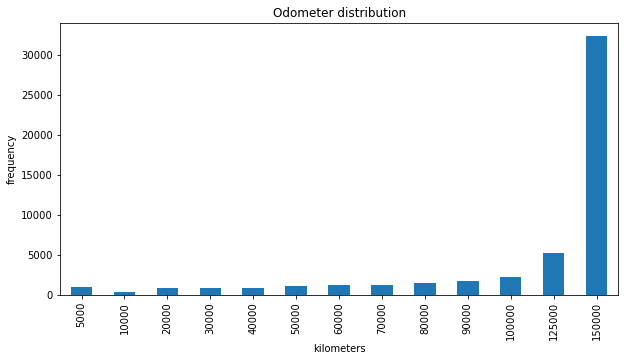

In [15]:
plt.figure(figsize=(10,5))
autos["odometer_km"].value_counts().sort_index().plot.bar(title = "Odometer distribution")
plt.xlabel("kilometers")
plt.ylabel("frequency")
plt.show()

The values in this field are rounded, which might indicate that sellers had to choose from pre-set options for this field. Additionally, the distribution of kilometers is left skewed, there are more high mileage than low mileage vehicles.

### Price column:

In [16]:
autos["price"].unique()

array([ 5000,  8500,  8990, ...,   385, 22200, 16995])

In [17]:
autos["price"].unique().shape

(2357,)

In [18]:
autos["price"].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [19]:
autos["price"].value_counts().sort_index(ascending=False).head(20)

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
Name: price, dtype: int64

In [20]:
autos["price"].value_counts().sort_index(ascending=True).head(20)

0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
20       4
25       5
29       1
30       7
35       1
Name: price, dtype: int64

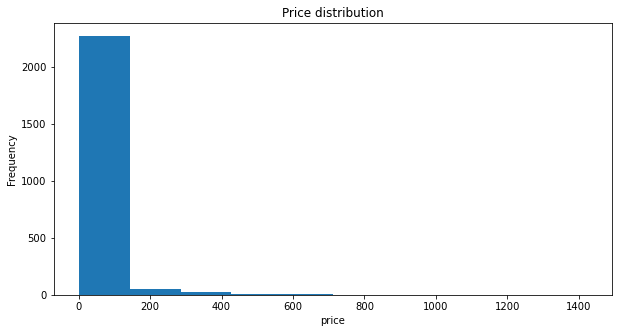

In [21]:
plt.figure(figsize=(10,5))
autos["price"].value_counts().sort_index().plot.hist(title = "Price distribution")
plt.xlabel("price")
plt.show()

There are 1,421 cars listed with 0 dollars and 156 cars listed with 1 dollar. Considering the fact that eBay is an auction-like site (it's like an auction, but transacctions are not binding, ie both buyer or seller can walk away from the sale without penalty), it's possible that some bids start with 0 dollars.

The maximum price is one hundred million dollars, which seems a lot. Prices increase steadily till 350,000 dollars, and then jump to less realistic numbers (after a bit of browsing, the most expensive car sold on eBay was around 350,000 dollars as well) so I'm removing all listings higher than this price.

In [22]:
autos = autos[autos["price"].between(0, 351000)]
autos["price"].describe()

count     49986.000000
mean       5721.525167
std        8983.617820
min           0.000000
25%        1100.000000
50%        2950.000000
75%        7200.000000
max      350000.000000
Name: price, dtype: float64

## Exploring the date columns

There are 5 columns representing date values. Some of these columns were created by the crawler, some came from the website itself:

- `date_crawled`: added by the crawler
- `last_seen`: added by the crawler
- `ad_created`: from the website
- `registration_month`: from the website
- `registration_year`: from the website

The `date_crawled`, `last_seen`, and `ad_created` columns are identified as string values by pandas, the `registration_month` and `registration_year` columns are integers.

In [23]:
autos[['date_crawled','ad_created','last_seen', 'registration_month', 'registration_year']][0:5]

,date_crawled,ad_created,last_seen,registration_month,registration_year
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54,3,2004
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08,6,1997
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37,7,2009
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28,6,2007
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50,7,2003


In [24]:
autos["date_crawled"].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05    0.025387
2016-03-06    0.013944
2016-03-07    0.035970
2016-03-08    0.033269
2016-03-09    0.033209
2016-03-10    0.032129
2016-03-11    0.032489
2016-03-12    0.036770
2016-03-13    0.015564
2016-03-14    0.036630
2016-03-15    0.033990
2016-03-16    0.029508
2016-03-17    0.031509
2016-03-18    0.013064
2016-03-19    0.034910
2016-03-20    0.037831
2016-03-21    0.037490
2016-03-22    0.032909
2016-03-23    0.032389
2016-03-24    0.029108
2016-03-25    0.031749
2016-03-26    0.032489
2016-03-27    0.031049
2016-03-28    0.034850
2016-03-29    0.034150
2016-03-30    0.033629
2016-03-31    0.031909
2016-04-01    0.033809
2016-04-02    0.035410
2016-04-03    0.038691
2016-04-04    0.036490
2016-04-05    0.013104
2016-04-06    0.003181
2016-04-07    0.001420
Name: date_crawled, dtype: float64

In [25]:
autos["date_crawled"].str[:10].value_counts(normalize=True, dropna=False).sort_values()

2016-04-07    0.001420
2016-04-06    0.003181
2016-03-18    0.013064
2016-04-05    0.013104
2016-03-06    0.013944
2016-03-13    0.015564
2016-03-05    0.025387
2016-03-24    0.029108
2016-03-16    0.029508
2016-03-27    0.031049
2016-03-17    0.031509
2016-03-25    0.031749
2016-03-31    0.031909
2016-03-10    0.032129
2016-03-23    0.032389
2016-03-11    0.032489
2016-03-26    0.032489
2016-03-22    0.032909
2016-03-09    0.033209
2016-03-08    0.033269
2016-03-30    0.033629
2016-04-01    0.033809
2016-03-15    0.033990
2016-03-29    0.034150
2016-03-28    0.034850
2016-03-19    0.034910
2016-04-02    0.035410
2016-03-07    0.035970
2016-04-04    0.036490
2016-03-14    0.036630
2016-03-12    0.036770
2016-03-21    0.037490
2016-03-20    0.037831
2016-04-03    0.038691
Name: date_crawled, dtype: float64

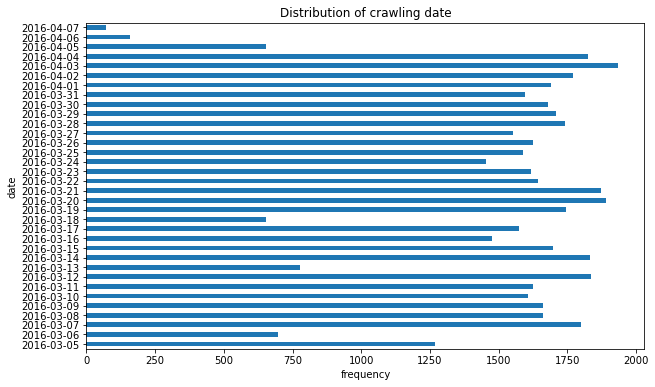

In [26]:
plt.figure(figsize=(10,6))
autos["date_crawled"].str[:10].value_counts().sort_index().plot.barh(title="Distribution of crawling date")
plt.xlabel("frequency")
plt.ylabel("date")
plt.show()

The website was crawled over a period of month from March 5 to April 7, 2016. The distribution of listings crawled on each day is roughly uniform.

In [27]:
autos["last_seen"].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05    0.001080
2016-03-06    0.004421
2016-03-07    0.005362
2016-03-08    0.007582
2016-03-09    0.009843
2016-03-10    0.010763
2016-03-11    0.012524
2016-03-12    0.023807
2016-03-13    0.008983
2016-03-14    0.012804
2016-03-15    0.015884
2016-03-16    0.016445
2016-03-17    0.027928
2016-03-18    0.007422
2016-03-19    0.015744
2016-03-20    0.020706
2016-03-21    0.020726
2016-03-22    0.021586
2016-03-23    0.018585
2016-03-24    0.019565
2016-03-25    0.019205
2016-03-26    0.016965
2016-03-27    0.016024
2016-03-28    0.020846
2016-03-29    0.022326
2016-03-30    0.024847
2016-03-31    0.023827
2016-04-01    0.023106
2016-04-02    0.024887
2016-04-03    0.025367
2016-04-04    0.024627
2016-04-05    0.124275
2016-04-06    0.220982
2016-04-07    0.130957
Name: last_seen, dtype: float64

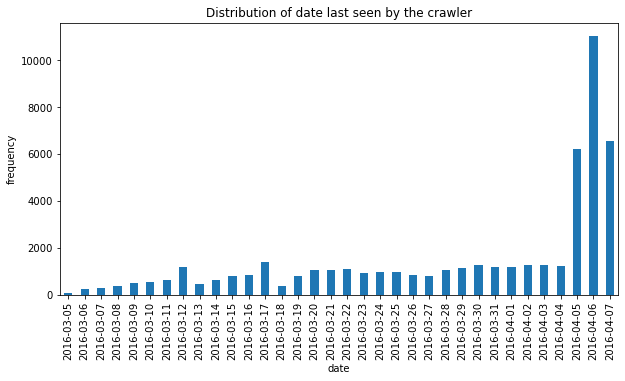

In [28]:
plt.figure(figsize=(10,5))
autos["last_seen"].str[:10].value_counts().sort_index().plot.bar(title="Distribution of date last seen by the crawler")
plt.xlabel("date")
plt.ylabel("frequency")
plt.show()

The `last_seen` column shows the last time the crawler saw the data, which indicates the date each vehicle was probably sold. The distribution of the last 3 days is very high, which is because of the end of the crawling period, rather than a sudden spike in sales.

In [29]:
print(autos["ad_created"].str[:10].unique().shape)
autos["ad_created"].str[:10].value_counts(normalize=True, dropna=False).sort_index()

(76,)


2015-06-11    0.000020
2015-08-10    0.000020
2015-09-09    0.000020
2015-11-10    0.000020
2015-12-05    0.000020
                ...   
2016-04-03    0.038931
2016-04-04    0.036850
2016-04-05    0.011843
2016-04-06    0.003261
2016-04-07    0.001280
Name: ad_created, Length: 76, dtype: float64

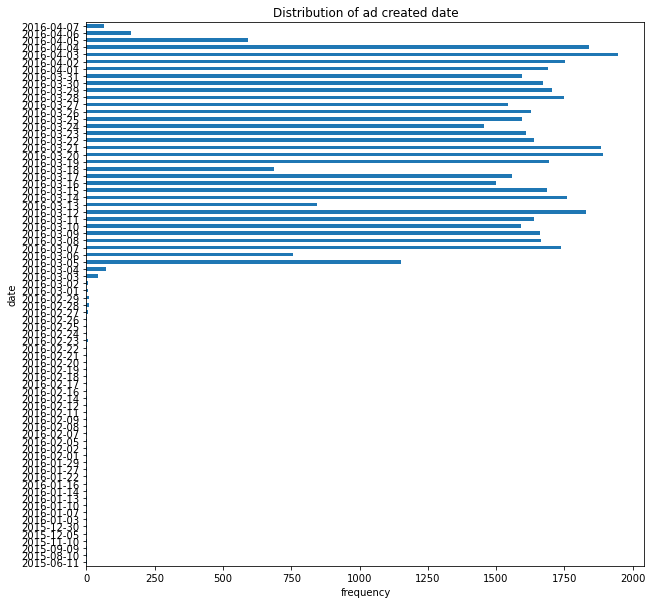

In [30]:
plt.figure(figsize=(10,10))
autos["ad_created"].str[:10].value_counts().sort_index().plot.barh(title="Distribution of ad created date")
plt.xlabel("frequency")
plt.ylabel("date")
plt.show()

There is a large variety of ad created dates. Most fall within 1-2 months of the listing date, but a few are quite old, with the oldest at around 9 months.

In [31]:
autos["registration_year"].describe()

count    49986.000000
mean      2005.075721
std        105.727161
min       1000.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

The year that the car was first registered probably indicates the age of the car. The minimum value is 1000, long before cars were invented and the maximum is 9999, many years into the future.

# Dealing with Incorrect Registration Year Data

The first car was invented in 1885, so any registration year before 1885 is inaccurate. Also, a car can't be registered after beeing seen in the listing, so a registration year above 2016 (and some in 2016) is inaccurate as well.

In [32]:
autos["registration_year"].value_counts(normalize=True).sort_index().head(20)

1000    0.00002
1001    0.00002
1111    0.00002
1500    0.00002
1800    0.00004
1910    0.00018
1927    0.00002
1929    0.00002
1931    0.00002
1934    0.00004
1937    0.00008
1938    0.00002
1939    0.00002
1941    0.00004
1943    0.00002
1948    0.00002
1950    0.00006
1951    0.00004
1952    0.00002
1953    0.00002
Name: registration_year, dtype: float64

In [33]:
autos["registration_year"].value_counts(normalize=True).sort_index().tail(20)

2011    0.032689
2012    0.026467
2013    0.016125
2014    0.013304
2015    0.007982
2016    0.026327
2017    0.029048
2018    0.009823
2019    0.000060
2800    0.000020
4100    0.000020
4500    0.000020
4800    0.000020
5000    0.000080
5911    0.000020
6200    0.000020
8888    0.000020
9000    0.000040
9996    0.000020
9999    0.000080
Name: registration_year, dtype: float64

In [34]:
wrong_date = len(autos[autos["registration_year"] >= 2016]) + len(autos[autos["registration_year"] < 1885])
wrong_date_percentage = wrong_date / len(autos) * 100
print(wrong_date_percentage)

6.573840675389109


About 6.6% of the data has wrong dates. I'll drop all rows with registration date before 1885 and after 2019. But most of the inaccurate registrations are in 2016-2018, so I'll keep these for now for further examination.

In [35]:
index_to_drop = autos[autos["registration_year"] > 2018].index
index_to_drop2 = autos[autos["registration_year"] < 1885].index

In [36]:
autos.drop(index_to_drop, inplace=True, axis=0)
autos.drop(index_to_drop2, inplace=True, axis=0)

C:\Users\eveli\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
autos["registration_year"].value_counts().sort_index()

1910       9
1927       1
1929       1
1931       1
1934       2
        ... 
2014     665
2015     399
2016    1316
2017    1452
2018     491
Name: registration_year, Length: 80, dtype: int64

## Translating values to English

Using Google translate to some of the columns from German to English. Also, these columns, along with the `model` column have missing values which I'm going to fill with the string "unknown".

### Vehicle type

In [38]:
autos["vehicle_type"].value_counts()

limousine     12854
kleinwagen    10822
kombi          9125
bus            4092
cabrio         3061
coupe          2534
suv            1986
andere          420
Name: vehicle_type, dtype: int64

In [39]:
mapping_dict = {
    "limousine" : "sedan",
    "kleinwagen" : "small car",
    "kombi" : "station wagon",
    "bus" : "bus",
    "cabrio" : "convertible",
    "coupe" : "coupe",
    "suv" : "suv",
    "andere" : "other"
}
autos["vehicle_type"] = autos["vehicle_type"].replace(mapping_dict)
autos["vehicle_type"].value_counts()

<ipython-input-39-2fea61329317>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos["vehicle_type"] = autos["vehicle_type"].replace(mapping_dict)


sedan            12854
small car        10822
station wagon     9125
bus               4092
convertible       3061
coupe             2534
suv               1986
other              420
Name: vehicle_type, dtype: int64

In [40]:
autos["gearbox"].value_counts()

manuell      36978
automatik    10321
Name: gearbox, dtype: int64

In [41]:
mapping_dict = {
    "manuell" : "manual",
    "automatik" : "automatic"
}
autos["gearbox"] = autos["gearbox"].replace(mapping_dict)
autos["gearbox"].value_counts()

<ipython-input-41-a9c465c124d7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos["gearbox"] = autos["gearbox"].replace(mapping_dict)


manual       36978
automatic    10321
Name: gearbox, dtype: int64

In [42]:
autos["fuel_type"].value_counts()

benzin     30092
diesel     14564
lpg          691
cng           75
hybrid        37
andere        22
elektro       19
Name: fuel_type, dtype: int64

In [43]:
mapping_dict = {
    "benzin" : "gasoline",
    "diesel" : "diesel",
    "lpg" : "lpg",
    "cng" : "cng",
    "hybrid" : "hybrid",
    "andere" : "other",
    "elektro" : "electric",
}
autos["fuel_type"] = autos["fuel_type"].replace(mapping_dict)
autos["fuel_type"].value_counts()

<ipython-input-43-b6b4d0fdc623>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos["fuel_type"] = autos["fuel_type"].replace(mapping_dict)


gasoline    30092
diesel      14564
lpg           691
cng            75
hybrid         37
other          22
electric       19
Name: fuel_type, dtype: int64

In [44]:
autos["unrepaired_damage"].value_counts()

nein    35218
ja       4938
Name: unrepaired_damage, dtype: int64

In [45]:
mapping_dict = {
    "nein" : "no",
    "ja" : "yes"
}
autos["unrepaired_damage"] = autos["unrepaired_damage"].replace(mapping_dict)
autos["unrepaired_damage"].value_counts()

<ipython-input-45-e1feb9caa2fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos["unrepaired_damage"] = autos["unrepaired_damage"].replace(mapping_dict)


no     35218
yes     4938
Name: unrepaired_damage, dtype: int64

In [46]:
autos["name"].value_counts()

Ford_Fiesta                                    78
BMW_316i                                       75
Volkswagen_Golf_1.4                            75
Volkswagen_Polo                                72
BMW_318i                                       72
                                               ..
Audi_80_Avant_2.0l_AHK                          1
Audi_A4_Avant_B5                                1
Renault_Megane_Grandtour_1.6_Fairway            1
_Zu_Verkaufen__Opel_Corsa_1.0_12V_World_Cup     1
Volkswagen_Sharan_2.0_Family                    1
Name: name, Length: 38718, dtype: int64

In [47]:
autos[["model","vehicle_type", "gearbox", "fuel_type", "unrepaired_damage"]] = autos[["model","vehicle_type", "gearbox", "fuel_type", "unrepaired_damage"]].fillna("unknown")

C:\Users\eveli\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [48]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49959 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_crawled        49959 non-null  object
 1   name                49959 non-null  object
 2   price               49959 non-null  int32 
 3   vehicle_type        49959 non-null  object
 4   registration_year   49959 non-null  int64 
 5   gearbox             49959 non-null  object
 6   power_ps            49959 non-null  int64 
 7   model               49959 non-null  object
 8   odometer_km         49959 non-null  int32 
 9   registration_month  49959 non-null  int64 
 10  fuel_type           49959 non-null  object
 11  brand               49959 non-null  object
 12  unrepaired_damage   49959 non-null  object
 13  ad_created          49959 non-null  object
 14  last_seen           49959 non-null  object
dtypes: int32(2), int64(3), object(10)
memory usage: 5.7+ MB


In [49]:
autos

,date_crawled,name,price,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,bus,2004,manual,158,andere,150000,3,lpg,peugeot,no,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,sedan,1997,automatic,286,7er,150000,6,gasoline,bmw,no,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,sedan,2009,manual,102,golf,70000,7,gasoline,volkswagen,no,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,small car,2007,automatic,71,fortwo,70000,6,gasoline,smart,no,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,station wagon,2003,manual,0,focus,150000,7,gasoline,ford,no,2016-04-01 00:00:00,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,24900,sedan,2011,automatic,239,q5,100000,1,diesel,audi,no,2016-03-27 00:00:00,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,1980,convertible,1996,manual,75,astra,150000,5,gasoline,opel,no,2016-03-28 00:00:00,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,13200,convertible,2014,automatic,69,500,5000,11,gasoline,fiat,no,2016-04-02 00:00:00,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,22900,station wagon,2013,manual,150,a3,40000,11,diesel,audi,no,2016-03-08 00:00:00,2016-04-05 16:45:07


In [50]:
autos.to_csv("ebaycars_cleaned.csv")